In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
os.chdir('..')

'''
exps = os.listdir()

for exp in exps:
    if 'smearing_classification_T=100nK' in exp:
        os.chdir(exp)
        times = os.listdir()
        for t in times:
            tp = t.replace('smearing_classification_T=100nK', 'smearing_classification_T=01uK')
            os.rename(t, tp)
        os.chdir('..')
        
        expp = exp.replace('smearing_classification_T=100nK', 'smearing_classification_T=01uK')
        os.rename(exp, expp)
'''
os.getcwd()


'c:\\Users\\BCimr\\OneDrive - University of Waterloo\\ECE\\3A\\Barrio-RQI\\MachineLearningQFT'

0.009817477042468103
0.9817477042468103
0.4908738521234052
23.324572196148065
[3.05366090e-02 3.86709562e-02 4.89721323e-02 6.20173373e-02
 7.85375264e-02 9.94583663e-02 1.25952103e-01 1.59503246e-01
 2.01991749e-01 2.55798346e-01 3.23937954e-01 4.10228602e-01
 5.19505368e-01 6.57891298e-01 8.33140496e-01 1.05507261e+00
 1.33612303e+00 1.69203971e+00 2.14276555e+00 2.71355580e+00
 3.43639327e+00 4.35178031e+00 5.51100830e+00 6.97903164e+00
 8.83810730e+00 1.11924039e+01 1.41738383e+01 1.79494679e+01
 2.27308502e+01 2.87858980e+01 3.64538906e+01 4.61644843e+01
 5.84617876e+01 7.40348487e+01 9.37562645e+01 1.18731075e+02
 1.50358679e+02 1.90411250e+02 2.41133031e+02 3.05366090e+02]
3.274757846799503e-11


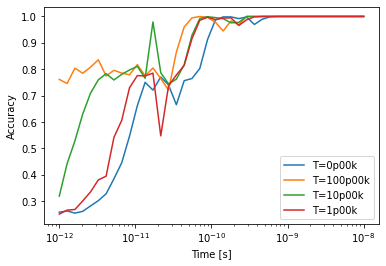

In [4]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
os.chdir('Data')
exps = os.listdir()
os.chdir('..')

for exp in exps:
    if 'smearing_classification_all' in exp:
        arr = pd.read_csv(os.getcwd() + '\\Data\\' + exp + '\\test_output.csv').to_numpy()
        times.append(arr[1, 1:])
        val_accs.append(arr[2, 1:])
        conf = []
        for i in range(1, arr[3:, :].shape[1]):
            conf.append(arr[3:, i].reshape((4, 4)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import utils.smearing_classification_params as scp

print(scp.T0)

fig, ax = plt.subplots()

for i in range(len(val_accs)):
    ax.plot(np.asarray(times[i])*scp.T0, val_accs[i], label=labels[i].split('_')[-1])

ax.set_xscale('log')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Accuracy')
ax.legend()

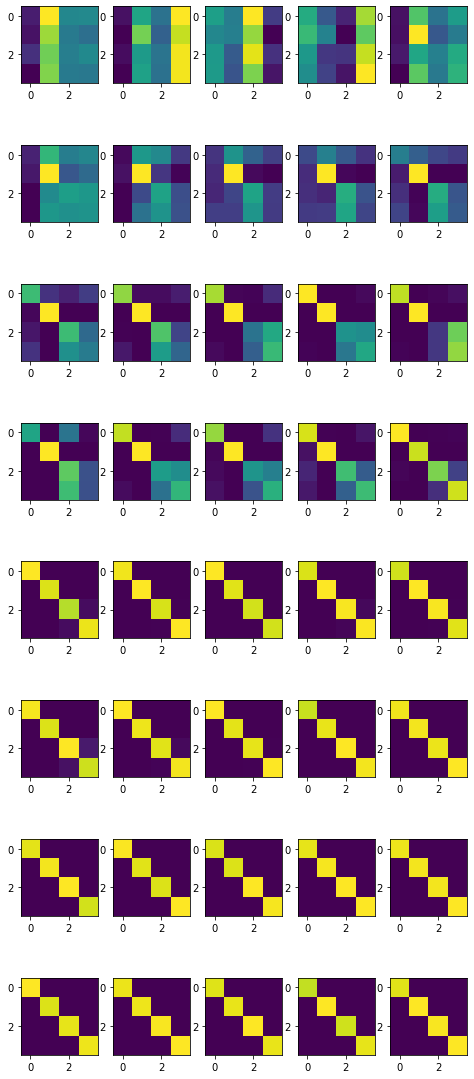

In [5]:
fig, ax = plt.subplots(8,5,figsize=(8,20))

for i in range(len(confusions[0])):
    ax[int(i//5)][int(i%5)].imshow(confusions[0][i])

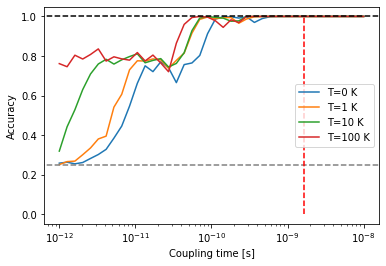

In [10]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
os.chdir('Data')
exps = os.listdir()
os.chdir('..')

for exp in exps:
    if 'smearing_classification_all' in exp:
        arr = pd.read_csv(os.getcwd() + '\\Data\\' + exp + '\\test_output.csv').to_numpy()
        times.append(arr[1, 1:])
        val_accs.append(arr[2, 1:])
        conf = []
        for i in range(1, arr[3:, :].shape[1]):
            conf.append(arr[3:, i].reshape((4, 4)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import utils.smearing_classification_params as scp

val_accs[3][13] = (val_accs[3][10] + val_accs[3][12])/2
val_accs[2][12] = (val_accs[2][14] + val_accs[2][10])/2

fig, ax = plt.subplots()

for i in [0,3,2,1]:
    ax.plot(np.asarray(times[i])*scp.T0, val_accs[i], label=labels[i].split('_')[-1].split('p')[0] + ' K')

ax.plot([0,1], [1,1], c='black', linestyle='--')
ax.plot([0,1], [0.25,0.25], c='grey', linestyle='--')
ax.plot([50*scp.T0]*2, [0,1], c='red', linestyle='--')

ax.set_xscale('log')
ax.set_xlim(10**(-12 - 4*0.05), 10**(-8 + 4*0.05))
ax.set_xlabel('Coupling time [s]')
ax.set_ylabel('Accuracy')
ax.legend(loc='right')
fig.savefig('Figures/smearing_classification_curves_all_T.png')
fig.savefig('Figures/smearing_classification_curves_all_T=0.pdf')

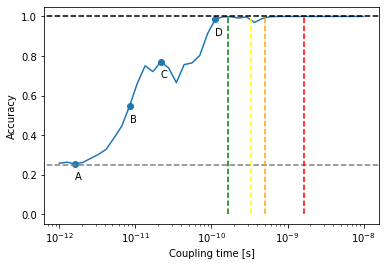

In [7]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
os.chdir('Data')
exps = os.listdir()
os.chdir('..')

for exp in exps:
    if 'smearing_classification_all' in exp:
        arr = pd.read_csv(os.getcwd() + '\\Data\\' + exp + '\\test_output.csv').to_numpy()
        times.append(arr[1, 1:])
        val_accs.append(arr[2, 1:])
        conf = []
        for i in range(1, arr[3:, :].shape[1]):
            conf.append(arr[3:, i].reshape((4, 4)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import utils.smearing_classification_params as scp

val_accs[3][13] = (val_accs[3][10] + val_accs[3][12])/2
val_accs[2][12] = (val_accs[2][14] + val_accs[2][10])/2

fig, ax = plt.subplots()

for i in [0]:
    ax.plot(np.asarray(times[i])*scp.T0, val_accs[i], label=labels[i].split('_')[-1].split('p')[0])

ax.plot([0,1], [1,1], c='black', linestyle='--')
ax.plot([0,1], [0.25,0.25], c='grey', linestyle='--')
ax.plot([50*scp.T0]*2, [0,1], c='red', linestyle='--')
ax.plot([scp.sigma*scp.T0]*2, [0,1], c='green', linestyle='--')
ax.plot([scp.sigma*2*scp.T0]*2, [0,1], c='yellow', linestyle='--')
ax.plot([scp.sigma*3*scp.T0]*2, [0,1], c='orange', linestyle='--')
select=[2,9,13,20]
ax.scatter([times[0][i]*scp.T0 for i in select], [val_accs[0][i] for i in select])

ax.set_xscale('log')
ax.set_xlim(10**(-12 - 4*0.05), 10**(-8 + 4*0.05))
ax.set_xlabel('Coupling time [s]')
ax.set_ylabel('Accuracy')

select_label = ['A','B','C','D']

for i, txt in enumerate(select_label):
    ax.annotate(txt, (times[0][select[i]]*scp.T0*(1), val_accs[0][select[i]]-0.08))


fig.savefig('Figures/smearing_classification_curve_T=0.png')
fig.savefig('Figures/smearing_classification_curve_T=0.pdf')

In [147]:
scp.sigma, scp.a

(5.092958178940651, 0.009817477042468103)

C:\Users\BCimr\AppData\Local\Temp\ipykernel_11040\4206772259.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['', 'Gaussian','Lorentzian', 'Quartic', 'Sharp'], rotation=60)
C:\Users\BCimr\AppData\Local\Temp\ipykernel_11040\4206772259.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_yticklabels(['', 'Gaussian','Lorentzian', 'Quartic', 'Sharp'])


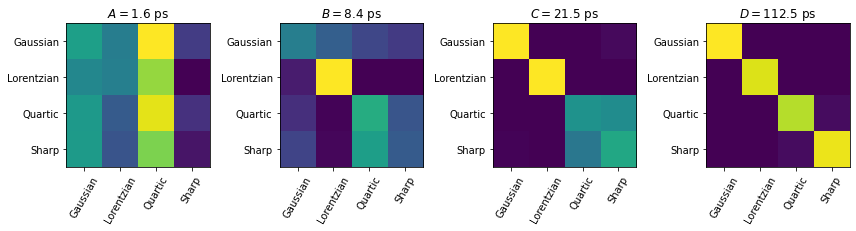

In [127]:
fig, ax = plt.subplots(1,4,figsize=(12,4))
labels = [str(np.around(times[0][i]*scp.T0*1e12, 1)) for i in select]
for i, j in enumerate([2, 9, 13, 20]):
    ax[i].imshow(confusions[0][j])
    ax[i].set_xticklabels(['', 'Gaussian','Lorentzian', 'Quartic', 'Sharp'], rotation=60)
    ax[i].set_yticklabels(['', 'Gaussian','Lorentzian', 'Quartic', 'Sharp'])
    ax[i].set_title(r'$' + select_label[i] + '='+labels[i] + '$ ps')

fig.tight_layout()
fig.savefig('Figures/smearing_classification_confusions_T=0.png')
fig.savefig('Figures/smearing_classification_confusions_T=0.pdf')

In [175]:
colours = plt.rcParams['axes.prop_cycle'].by_key()['color']


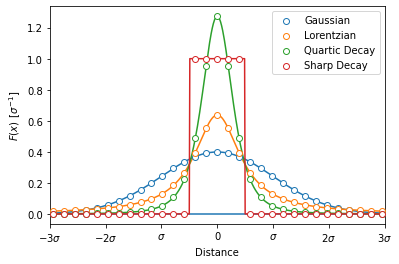

In [194]:
import utils.smearing_functions as sf

xfine = np.linspace(-50, 50, 2001)
xcourse = np.linspace(-50, 50, 101)
ygc = sf.gaussian_smearing(xcourse, scp.sigma)*scp.sigma
ylc = sf.lorentzian_smearing(xcourse, scp.sigma)*scp.sigma
yqc = sf.quartic_smearing(xcourse, scp.sigma)*scp.sigma
ysc = [sf.sharp_smearing(xcourse[i], scp.sigma)*scp.sigma for i in range(len(xcourse))]

ygf = sf.gaussian_smearing(xfine, scp.sigma)*scp.sigma
ylf = sf.lorentzian_smearing(xfine, scp.sigma)*scp.sigma
yqf = sf.quartic_smearing(xfine, scp.sigma)*scp.sigma
ysf = [sf.sharp_smearing(xfine[i], scp.sigma)*scp.sigma for i in range(len(xfine))]

yc = [ygc, ylc, yqc, ysc]
yf = [ygf, ylf, yqf, ysf]

fig, ax = plt.subplots()

ax.plot([-50, 50], [0,0])

smearing_labels=['Gaussian', 'Lorentzian', 'Quartic Decay', 'Sharp Decay']
for i in range(len(yc)):
    ax.plot(xfine, yf[i], c=colours[i])
    ax.scatter(xcourse, yc[i], marker='o', edgecolor=colours[i], facecolor='white', zorder=50, label=smearing_labels[i])

ax.set_xlim(-3*scp.sigma, 3*scp.sigma)
ax.set_xticks([i*scp.sigma for i in range(-3,4)])

labels = [r'$' + str(i) + '\sigma$' for i in [-3,-2,2,3]]
labels.insert(2, r'$\sigma$')
labels.insert(3, '0')
labels.insert(4, r'$\sigma$')

ax.set_xticklabels(labels)
ax.set_xlabel('Distance')
ax.set_ylabel(r'$F(x)\:\: [\sigma^{-1}]$')
ax.legend()
fig.savefig('Figures\smearing_functions.png')
fig.savefig('Figures\smearing_functions.pdf')

3.772521039513027e-11


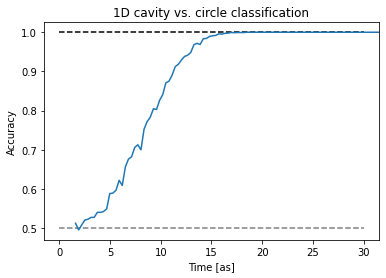

In [238]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
os.chdir('Data')
exps = os.listdir()
os.chdir('..')

for exp in exps:
    if 'circular_boundary_classification_run2' in exp:
        arr = pd.read_csv(os.getcwd() + '\\Data\\' + exp + '\\test_output.csv').to_numpy()
        times.append(arr[0, 1:])
        val_accs.append(arr[1, 1:])
        conf = []
        for i in range(1, arr[2:, :].shape[1]):
            conf.append(arr[2:, i].reshape((2, 2)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import utils.circular_classification_params as ccp

print(ccp.T0)

fig, ax = plt.subplots()
ax.plot([0,30], [1,1], c='black', linestyle='--')
ax.plot([0,30], [0.5,0.5], c='grey', linestyle='--')
ax.plot([50*ccp.T0]*2, [0.5,0.5], c='grey', linestyle='--')

for i in range(len(val_accs)):
    ax.plot(np.asarray(times[i])*ccp.T0*1e15, val_accs[i], label=labels[i].split('_')[-3])


ax.set_xlim(-30*0.05, 30*1.05)
ax.set_title('1D cavity vs. circle classification')
ax.set_xlabel('Time [as]')
ax.set_ylabel('Accuracy')
fig.savefig('Figures\oneD_cavity_vs_circle.png')
fig.savefig('Figures\oneD_cavity_vs_circle.pdf')


(5, 51)
3.772521039513027e-11


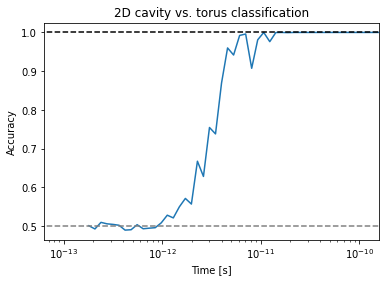

In [239]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
os.chdir('Data')
exps = os.listdir()
os.chdir('..')

for exp in exps:
    if '2D_geometry_classification' in exp:
        arr = pd.read_csv(os.getcwd() + '\\Data\\' + exp + '\\test_output.csv').to_numpy()
        print(arr[2:].shape)
        times.append(arr[1, 1:])
        val_accs.append(arr[2, 1:])
        conf = []
        for i in range(1, arr[3:, :].shape[1]):
            conf.append(arr[3:, i].reshape((2, 2)))
        confusions.append(conf)
        labels.append(exp)
        idxs.append(exp)

import utils.circular_classification_params as ccp

print(ccp.T0)

fig, ax = plt.subplots()

for i in range(len(val_accs)):
    ax.plot(np.asarray(times[i])*ccp.T0_2d, val_accs[i], label=labels[i].split('_')[-3])

ax.set_xscale('log')

ax.plot([0,30], [1,1], c='black', linestyle='--')
ax.plot([0,30], [0.5,0.5], c='grey', linestyle='--')
ax.plot([50*ccp.T0]*2, [0.5,0.5], c='grey', linestyle='--')

ax.set_xlim(10**(-13-4*0.05), 10**(-10+4*0.05))
ax.set_title('2D cavity vs. torus classification')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Accuracy')
fig.savefig('Figures/twoD_rectangular_cavity_vs_torus.png')
fig.savefig('Figures/twoD_rectangular_cavity_vs_torus.pdf')


(8, 51)
3.274757846799503e-11


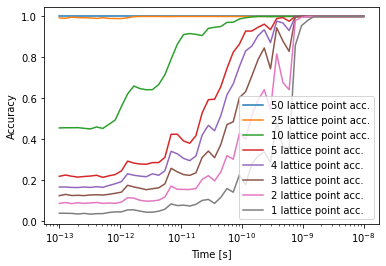

In [ ]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
os.chdir('Data')
exps = os.listdir()
os.chdir('..')

for exp in exps:
    if 'position_regression' in exp:
        arr = pd.read_csv(os.getcwd() + '\\Data\\' + exp + '\\test_output.csv').to_numpy()
        print(arr[2:].shape)
        times.append(arr[1, 1:])
        val_accs = arr[2:, 1:]
        labels.append(exp)
        idxs.append(exp)

import utils.detector_position_regression_params as dprp

print(dprp.T0)

fig, ax = plt.subplots()
deltas = [0.5, 0.25, 0.1, 0.05, 0.04, 0.03, 0.02, 0.01]

for i in range(val_accs.shape[0]):
    ax.plot(np.asarray(times[0])*dprp.T0, val_accs[i], label=str(int(deltas[i]*100)) + ' lattice point acc.')

ax.set_xscale('log')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Accuracy')
ax.legend()

(8, 51)
3.274757846799503e-11


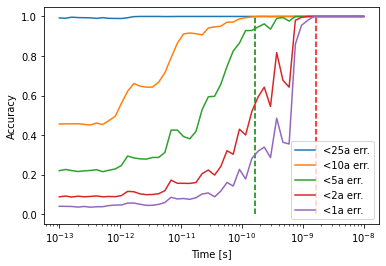

In [213]:
import pandas as pd

val_accs = []
confusions = []
times = []
labels = []
idxs = []
os.chdir('Data')
exps = os.listdir()
os.chdir('..')

for exp in exps:
    if 'position_regression' in exp:
        arr = pd.read_csv(os.getcwd() + '\\Data\\' + exp + '\\test_output.csv').to_numpy()
        print(arr[2:].shape)
        times.append(arr[1, 1:])
        val_accs = arr[2:, 1:]
        labels.append(exp)
        idxs.append(exp)

import utils.detector_position_regression_params as dprp

print(dprp.T0)

fig, ax = plt.subplots(figsize=(6,4))
deltas = [0.5, 0.25, 0.1, 0.05, 0.04, 0.03, 0.02, 0.01]


ax.plot([50*scp.T0]*2, [0,1], c='red', linestyle='--')
ax.plot([scp.sigma*scp.T0]*2, [0,1], c='green', linestyle='--')

for i in [1,2,3,6,7]:
    ax.plot(np.asarray(times[0])*dprp.T0, val_accs[i], label='<' + str(int(deltas[i]*100)) + 'a err.')

ax.set_xscale('log')
ax.set_xlabel('Time [s]')
ax.set_xlim(10**(-13 - 5*0.05), 10**(-8 + 5*0.05))
ax.set_ylabel('Accuracy')
ax.legend()
fig.savefig('Figures\detector_position_regression.png')
fig.savefig('Figures\detector_position_regression.pdf')
